## Avacado Project
Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

## Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


## Inspiration /Label 

Your task is to make a mode that can consider the data provided and predict the Average Price.


In [1]:
#Importing Libraries 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings('ignore')
import scipy
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv(r"C:\Users\Admin\Desktop\Dataset\avocado.csv")
df.head(10)
#top 10 data below

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   
5           5  2015-11-22          1.26      55979.78  1184.27   48067.99   
6           6  2015-11-15          0.99      83453.76  1368.92   73672.72   
7           7  2015-11-08          0.98     109428.33   703.75  101815.36   
8           8  2015-11-01          1.02      99811.42  1022.15   87315.57   
9           9  2015-10-25          1.07      74338.76   842.40   64757.44   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   
5   43.61     6683.91     6556.47      127.44          0.0  conventional   
6   93.26     8318.86     8196.81      122.05          0.0  conventional   
7   80.00     6829.22     6266.85      562.37          0.0  conventional   
8   85.34    11388.36    11104.53      283.83          0.0  conventional   
9  113.00     8625.92     8061.47      564.45          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany  
5  2015  Albany  
6  2015  Albany  
7  2015  Albany  
8  2015  Albany  
9  2015  Albany

In [109]:
# Remove column name 'A'
dt = df.drop(['Unnamed: 0'], axis = 1)
dt.head(10)

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
5  2015-11-22          1.26      55979.78  1184.27   48067.99   43.61   
6  2015-11-15          0.99      83453.76  1368.92   73672.72   93.26   
7  2015-11-08          0.98     109428.33   703.75  101815.36   80.00   
8  2015-11-01          1.02      99811.42  1022.15   87315.57   85.34   
9  2015-10-25          1.07      74338.76   842.40   64757.44  113.00   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany  
5     6683.91     6556.47      127.44          0.0  conventional  2015  Albany  
6     8318.86     8196.81      122.05          0.0  conventional  2015  Albany  
7     6829.22     6266.85      562.37          0.0  conventional  2015  Albany  
8    11388.36    11104.53      283.83          0.0  conventional  2015  Albany  
9     8625.92     8061.47      564.45          0.0  conventional  2015  Albany

### Data Inspection

In [10]:
dt.shape
#below we get 18249 rows and 13 columns

(18249, 13)

In [11]:
#Explore the data types of each column
dt.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

we have 12 columns and 3 objects

In [12]:
dt.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000  
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899  
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938  
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000  
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000  
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000  
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000  
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000

In [13]:
dt['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

we have 2 diffrent records for type

In [19]:
t = dt['region'].value_counts()
t

PhoenixTucson          338
LasVegas               338
CincinnatiDayton       338
Portland               338
Albany                 338
Midsouth               338
Southeast              338
Orlando                338
SouthCarolina          338
Seattle                338
Tampa                  338
Syracuse               338
Indianapolis           338
BaltimoreWashington    338
Denver                 338
StLouis                338
Boston                 338
NorthernNewEngland     338
Spokane                338
California             338
Boise                  338
SouthCentral           338
GrandRapids            338
Philadelphia           338
Louisville             338
HarrisburgScranton     338
RaleighGreensboro      338
Atlanta                338
LosAngeles             338
NewYork                338
SanDiego               338
Chicago                338
BuffaloRochester       338
Plains                 338
Nashville              338
Detroit                338
Houston                338
N

In [20]:
t.count()

54

54 regions have 338 record but we can see WestTexNewMexico region have only 335 records

In [21]:
dt.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [22]:
dt.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

we dont have any null value in this data set

In [23]:
dt.describe(include=['O'])

Date          type         region
count        18249         18249          18249
unique         169             2             54
top     2017-02-26  conventional  PhoenixTucson
freq           108          9126            338

above data show it 3 diffrent type of object unique records per objects

In [27]:
# To find the correlation among
# the columns using pearson method
dt.corr(method ='pearson')

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.192752 -0.208317 -0.172928 -0.179446   
Total Volume     -0.192752      1.000000  0.977863  0.974181  0.872202   
4046             -0.208317      0.977863  1.000000  0.926110  0.833389   
4225             -0.172928      0.974181  0.926110  1.000000  0.887855   
4770             -0.179446      0.872202  0.833389  0.887855  1.000000   
Total Bags       -0.177088      0.963047  0.920057  0.905787  0.792314   
Small Bags       -0.174730      0.967238  0.925280  0.916031  0.802733   
Large Bags       -0.172940      0.880640  0.838645  0.810015  0.698471   
XLarge Bags      -0.117592      0.747157  0.699377  0.688809  0.679861   
year              0.093197      0.017193  0.003353 -0.009559 -0.036531   

              Total Bags  Small Bags  Large Bags  XLarge Bags      year  
AveragePrice   -0.177088   -0.174730   -0.172940    -0.117592  0.093197  
Total Volume    0.963047    0.967238    0.880640     0.747157  0.017193  
4046            0.920057    0.925280    0.838645     0.699377  0.003353  
4225            0.905787    0.916031    0.810015     0.688809 -0.009559  
4770            0.792314    0.802733    0.698471     0.679861 -0.036531  
Total Bags      1.000000    0.994335    0.943009     0.804233  0.071552  
Small Bags      0.994335    1.000000    0.902589     0.806845  0.063915  
Large Bags      0.943009    0.902589    1.000000     0.710858  0.087891  
XLarge Bags     0.804233    0.806845    0.710858     1.000000  0.081033  
year            0.071552    0.063915    0.087891     0.081033  1.000000

above dataframe show the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.

Text(0.5, 1.0, 'type')

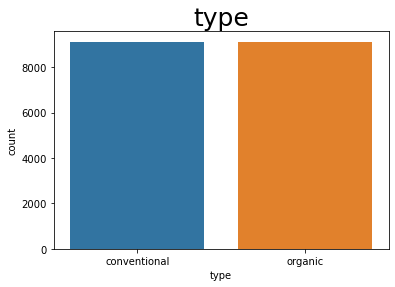

In [28]:
sns.countplot(dt.type)
plt.title("type",fontsize=25)

conventional and organic data are almost same

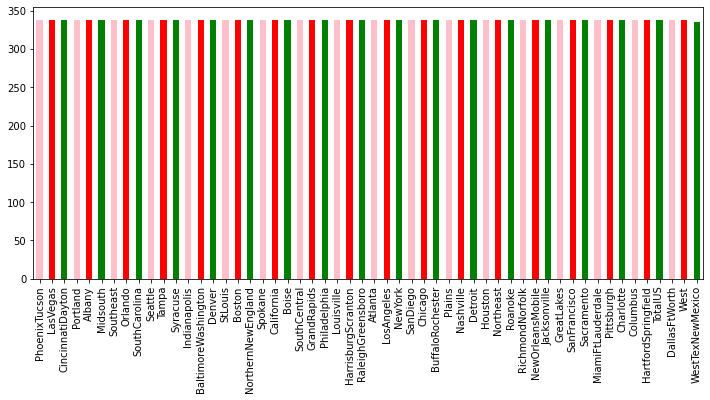

In [29]:
plt.subplots(figsize=(12,5))
dt['region'].value_counts(normalize = True)
dt['region'].value_counts(dropna = False).plot.bar(color=['pink', 'red', 'green'])
plt.show()

In [54]:
import plotly.express as px
fig = px.histogram(
    dt, 
    "type", 
    nbins=80, 
    title ='type', 
    width=800,
    height=500
)

fig.show()

In [53]:
fig = px.histogram(
    dt, 
    "AveragePrice", 
    nbins=80, 
    title ='AveragePrice', 
    width=800,
    height=500
)

fig.show()

In [52]:
fig = px.histogram(
    dt, 
    "Total Volume", 
    nbins=80, 
    title ='Total Volume', 
    width=800,
    height=500
)

fig.show()

In [51]:
fig = px.histogram(
    dt, 
    "year", 
    nbins=80, 
    title ='year', 
    width=800,
    height=500
)

fig.show()

In [50]:
fig = px.histogram(
    dt, 
    "Total Bags", 
    nbins=80, 
    title ='Total Bags', 
    width=800,
    height=500
)

fig.show()

In [49]:
fig = px.histogram(
    dt, 
    "Small Bags", 
    nbins=80, 
    title ='Small Bags', 
    width=800,
    height=500
)

fig.show()

In [48]:
fig = px.bar(
    dt, 
    x='AveragePrice', 
    orientation='v', 
    title='AveragePrice', 
    width=600,
color_discrete_sequence=["fuchsia"]
)

fig.show()

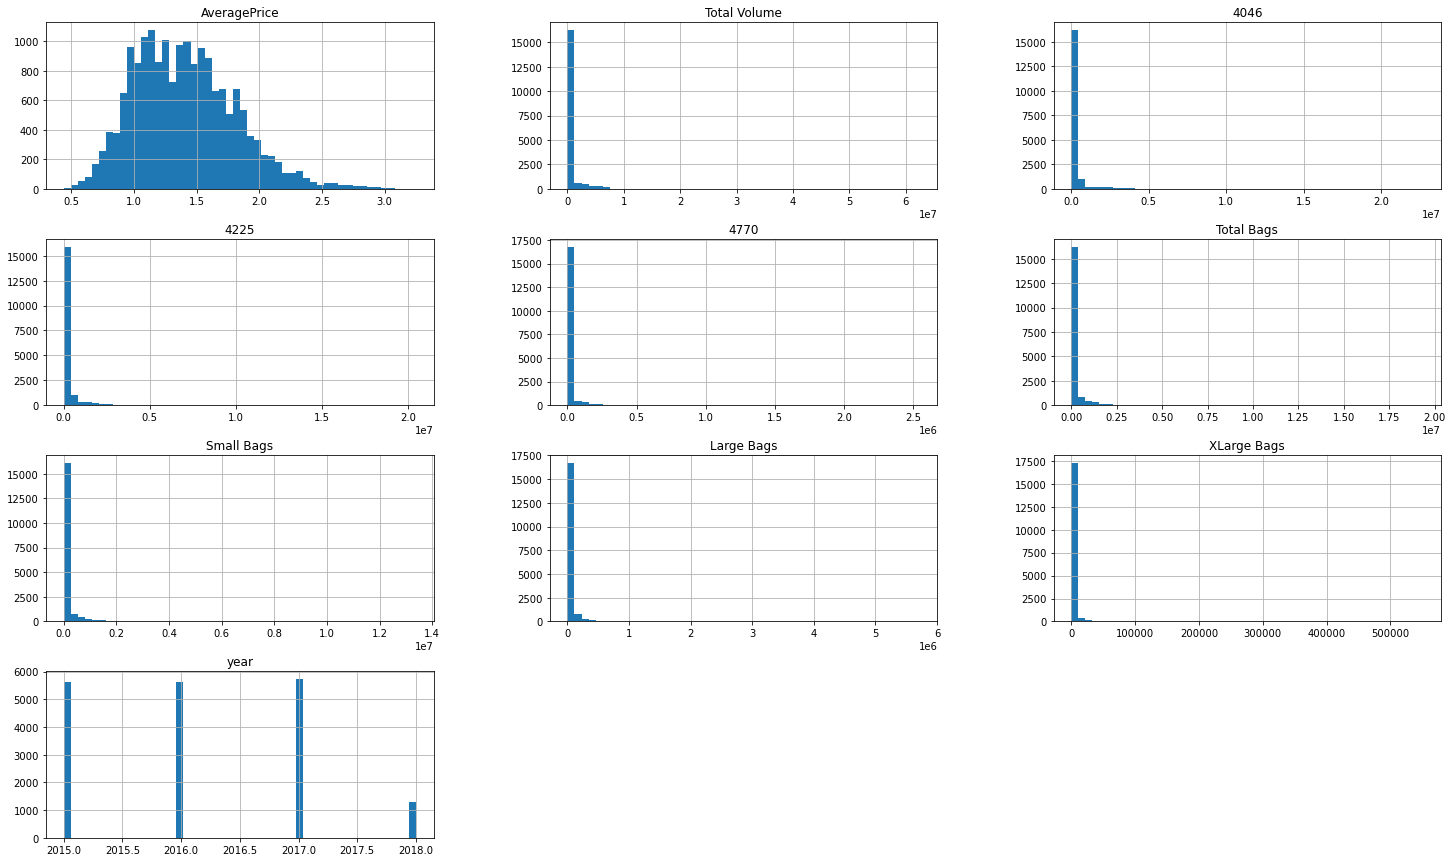

In [47]:
dt.hist(bins=50, figsize=(25,15))
plt.show()

In [63]:
fig = px.pie(dt, names = "type", title = "type ", color_discrete_sequence=px.colors.qualitative.Set2)
fig.show()

In [64]:
fig = px.pie(dt, names = "region", title = "region ")
fig.show()

In [59]:
fig = px.bar(dt, x="year", y="AveragePrice",height=600)
fig.show()

<AxesSubplot:>

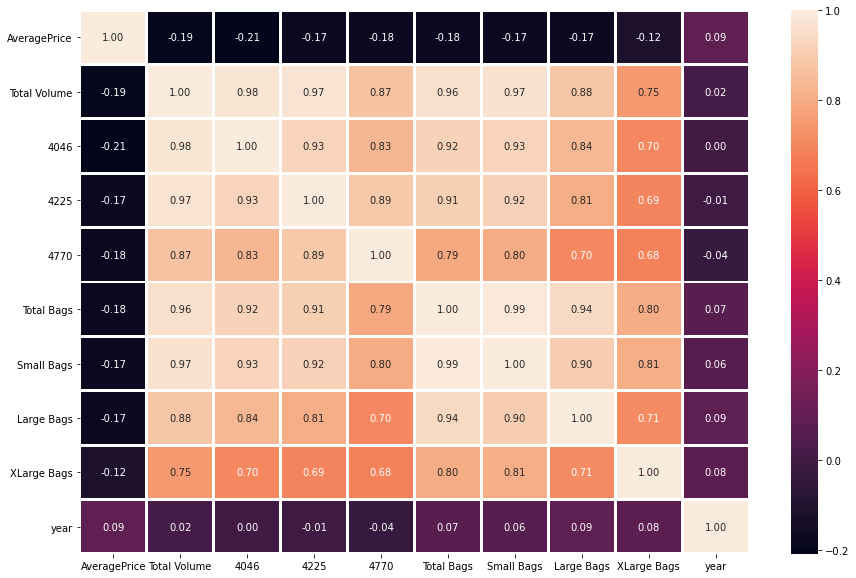

In [62]:
plt.figure(figsize=(15,10))
sns.heatmap(dt.corr(), annot=True, fmt='.2f', linewidths=2)

In [73]:
X = df.drop(columns=["Date"])
y = df["Date"]

In [82]:
dt.Date.replace({'2015': 1, '2016': 2,'2017': 3,'2018': 4}, inplace=True)

In [98]:
dt.region.replace({'conventional': 1, 'organic': 2}, inplace=True)

In [102]:
# Creating dummy variables
dummies = pd.get_dummies(dt[['year','region']],drop_first=True)
df_dummies = pd.concat([dt[['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type']],dummies],axis=1)
target = dt['AveragePrice']

In [103]:


# Splitting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dummies,target,test_size=0.30)

# Standardizing the data
cols_to_std = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags', 'XLarge Bags']
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train[cols_to_std])
X_train[cols_to_std] = scaler.transform(X_train[cols_to_std])
X_test[cols_to_std] = scaler.transform(X_test[cols_to_std])

In [104]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
model = XGBRegressor()
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred})

Training Score: 0.926068343988071
Testing Score: 0.8452117904810084


In [105]:
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]

   Predicted
0   1.373555
1   1.130141
2   1.894988
3   1.334717
4   0.965121


### Conclusion

In [ ]:
Root Mean Square Error (RMSE) is the standard deviation of the prediction errors. prediction errors are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these prediction errors are. In diffrent  words, it tells  how concentrated the data is around the line of best fit.

In [106]:
mae = np.round(mean_absolute_error(y_test,Y_pred),3)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 0.116


In [107]:
mse = np.round(mean_squared_error(y_test,Y_pred),3)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.025


In [108]:
score = np.round(r2_score(y_test,Y_pred),3)
print('R2 Score:', score)

R2 Score: 0.845
